# Summary Statistics

This notebook summary statistics on the pre-processed data.

In [69]:
# import packages
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.formula.api as smf
import statsmodels as sm
from plotnine import *


In [70]:
# import dataset
working_dir = "../20_intermediate_files/"
final = working_dir + "analysis_df.csv"
# read in the data as a pandas dataframe
final_df = pd.read_csv(final)
# final_df = final_df.fillna(0)
final_df.head()
states = ["AL", "AZ", "CA", "FL", "GA", "ID", "MS", "OK", "OR", "SC", "TX", "WA"]
final_df = final_df.loc[final_df["state"].isin(states)]

In [71]:
time_series_df = final_df.groupby(["year", "state"], as_index=False).mean()

/Users/poojakabber/.venv/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


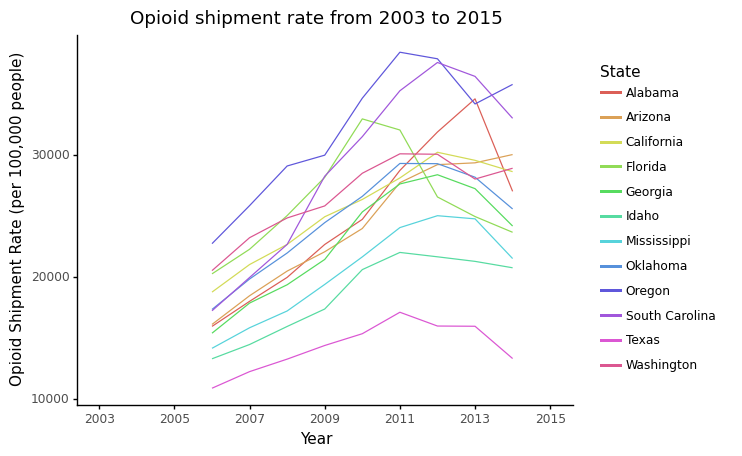

In [72]:
fl_shiprate_plot = (
    ggplot(time_series_df, aes(x="year", y="ship_rate", color="state"))
    + geom_line()
    + theme_classic()
    + labs(title="Opioid shipment rate from 2003 to 2015", color="State")
    + xlab("Year")
    + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + ylab("Opioid Shipment Rate (per 100,000 people)")
    + scale_color_discrete(
        labels=["Alabama", "Arizona", "California", "Florida", "Georgia", "Idaho", "Mississippi", "Oklahoma", "Oregon", "South Carolina", "Texas", "Washington"]
    ) 
)
print(fl_shiprate_plot)

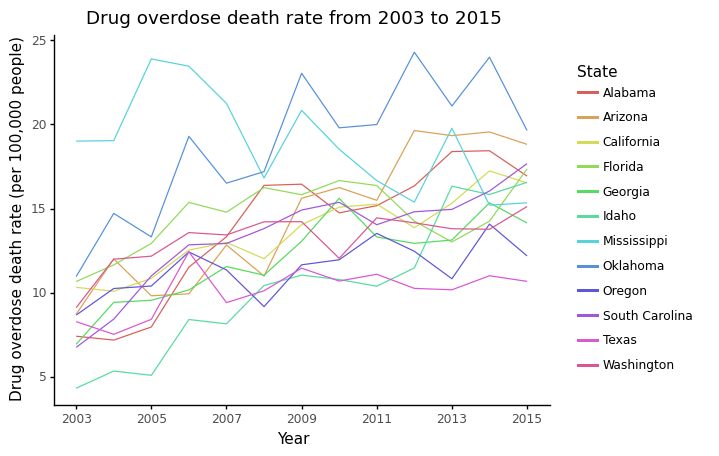

In [74]:
overdose_death_rate_plot = (
    ggplot(time_series_df, aes(x="year", y="death_rate", color="state", shape = "state"))
    + geom_line()
    + theme_classic()
    + labs(title="Drug overdose death rate from 2003 to 2015", color="State", shape="State")
    + xlab("Year")
    + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + ylab("Drug overdose death rate (per 100,000 people)")
    + scale_color_discrete(
        labels=["Alabama", "Arizona", "California", "Florida", "Georgia", "Idaho", "Mississippi", "Oklahoma", "Oregon", "South Carolina", "Texas", "Washington"]
    ) 
)
print(overdose_death_rate_plot)

In [62]:
boxplot_df = final_df.groupby(["year", "state"], as_index=False).mean()
boxplot_df.head()

,year,state,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,AL,1067.000000,1.067200e+07,35.000000,NaN,71339.343284,7.420313,NaN
1,2003,AZ,4013.866667,4.014067e+07,91.428571,NaN,426134.466667,8.720462,NaN
2,2003,CA,6058.000000,6.058200e+07,98.212121,NaN,642309.586207,10.319364,NaN
3,2003,FL,12067.000000,1.206720e+08,55.090909,NaN,280616.567164,10.665085,NaN
4,2003,GA,13161.490566,1.316169e+08,25.100000,NaN,60928.635220,6.942932,NaN


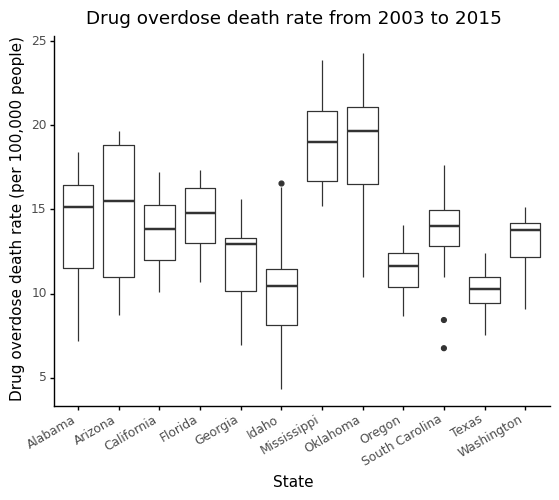

In [63]:
boxplot1 = (
    ggplot(boxplot_df, aes(x="state", y="death_rate"))
    + geom_boxplot()
    + theme_classic()
    + theme(axis_text_x  = element_text(angle = 30, hjust = 1))
    + labs(title="Drug overdose death rate from 2003 to 2015")
    + xlab("State")
    # + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + ylab("Drug overdose death rate (per 100,000 people)")
    +scale_x_discrete(labels=["Alabama", "Arizona", "California", "Florida", "Georgia", "Idaho", "Mississippi", "Oklahoma", "Oregon", "South Carolina", "Texas", "Washington"])
)
print(boxplot1)

/Users/poojakabber/.venv/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 48 rows containing non-finite values.


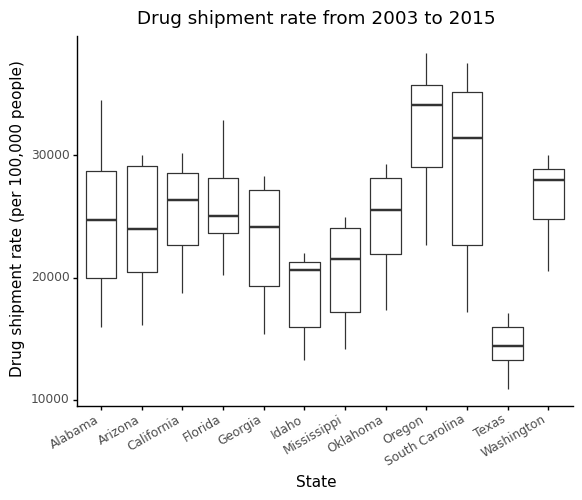

In [64]:
boxplot2 = (
    ggplot(boxplot_df, aes(x="state", y="ship_rate"))
    + geom_boxplot()
    + theme_classic()
    + theme(axis_text_x  = element_text(angle = 30, hjust = 1))
    + labs(title="Drug shipment rate from 2003 to 2015")
    + xlab("State")
    # + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + ylab("Drug shipment rate (per 100,000 people)")
    +scale_x_discrete(labels=["Alabama", "Arizona", "California", "Florida", "Georgia", "Idaho", "Mississippi", "Oklahoma", "Oregon", "South Carolina", "Texas", "Washington"])
)
print(boxplot2)